In [1]:
import cv2
import os
import sklearn
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import xlrd

In [2]:
from Data_preproc import FACE
face=FACE('原始数据')

print('\nface.data.shape:',face.data.shape,sep='\n')
print('\nface.image.shape:',face.image.shape,sep='\n')
print('\nface.target[::100]:',face.target[::100],sep='\n')
print('\nface.number[::200]:',face.number[::200],sep='\n')
print('\nface.label[50]:',face.label[1],sep='\n')
#plt.imshow(face.image[0],cmap=plt.cm.gray)
#plt.show()

导入数据...
1228 缺失
1232 缺失
1808 缺失
4056 缺失
4135 缺失
4136 缺失
5004 缺失
2412 已压缩为128*128
2416 已压缩为128*128
导入完成！

face.data.shape:
(3993, 16384)

face.image.shape:
(3993, 128, 128)

face.target[::100]:
[1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 0]

face.number[::200]:
[1223, 1425, 1625, 1826, 2026, 2226, 2426, 2626, 2826, 3026, 3226, 3426, 3626, 3826, 4026, 4229, 4429, 4629, 4829, 5030]

face.label[50]:
 1224 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())



In [3]:
# 删除异常数据
def Del_unusual(xlsdir='原始数据+matlab/noise_collection.xls', sheets=[]):
    '''输入表格路径、工作表名名称和列号（从第二行开始）循环列表，删除face中对应图号的数据'''
    workbook = xlrd.open_workbook(xlsdir)
    del_nums = []   
    for i in sheets:
        sheet = workbook.sheet_by_name(i[0])
        for j in i[1:len(i)]:
            del_nums += [i for i in sheet.col_values(j,1) if i]
    for i in range(len(del_nums)):
        del_nums[i] = int(del_nums[i])
    print('del_nums:', del_nums)
    face.delete(del_nums)


del_clms = [['异常汇总', 2, 3]]
Del_unusual('原始数据+matlab/noise_collection.xls',del_clms)

del_nums: [3883, 2099, 2100, 2101, 2104, 2105, 2106, 3283, 3860, 3861, 4125, 4146, 4237, 4267, 4295, 4335, 4498, 4566, 4679, 4710, 4779, 4992, 5113, 4355, 4356, 4357, 4358, 4359, 2102, 2103, 3862, 4354, 4429, 4452, 4908, 4637, 5076]
deleting:  3883  2099  2100  2101  2104  2105  2106  3283  3860  3861  4125  4146  4237  4267  4295  4335  4498  4566  4679  4710  4779  4992  5113  4355  4356  4357  4358  4359  2102  2103  3862  4354  4429  4452  4908  4637  5076  
deleted 37/37 images!


In [4]:
X=face.data
Y=face.target
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
print('预测准确率：',score)

预测准确率： 0.7320977253580455


In [10]:
face.target

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
face.label[0:3963:1]

[" 1223 (_sex  male) (_age  child) (_race white) (_face smiling) (_prop '())\n",
 " 1224 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1225 (_sex  male) (_age  child) (_race white) (_face smiling) (_prop '())\n",
 " 1226 (_sex  male) (_age  child) (_race white) (_face smiling) (_prop '())\n",
 " 1227 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1229 (_sex  male) (_age  adult) (_race white) (_face serious) (_prop '())\n",
 " 1230 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1231 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1233 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1234 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1235 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1236 (_sex  male) (_age  child) (_race white) (_face serious) (_prop '())\n",
 " 1237 (_sex  male) (_age  

In [4]:
face.feature_name=[]
for i in range(16384):
    face.feature_name.append(str(i))
print(len(face.feature_name))
print(face.feature_name[0:10])

16384
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


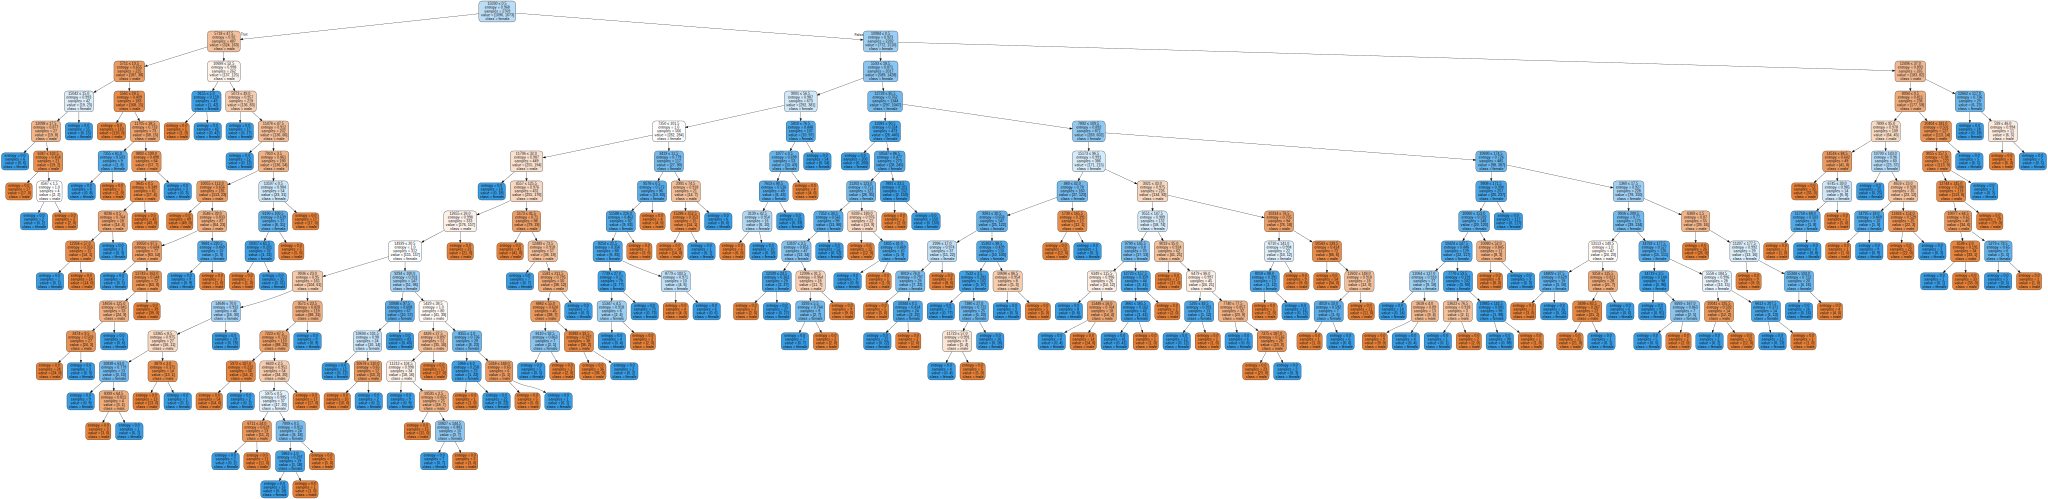

In [6]:
 import graphviz 

#face.label=['sex','age','race','experssion']

#face.feature_name[0:13]=['sex_male','sex_female','age_child','age_adult','age_teen','age_senior','race_white','race_asian','race_hispanic','race_black','experssion_smiling','experssion_serious','experssion_funny']
 dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=face.feature_name, 
                      class_names=['male','female'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [12]:
clf.apply(Xtest)

array([135,  22, 302,  64,  64, 135, 407, 269,  84, 135, 368, 417, 446,
        64, 147, 119, 175, 135, 442, 119, 111, 453, 102, 264,   5, 326,
        71, 228, 302, 331, 326, 338, 429, 449, 124, 429,  54, 175,  78,
       242], dtype=int64)